# TensorFlow and Keras

## An Introduction
 

Install:
  + conda install -c conda-forge pydot 
  
  Install the Graphviz package.

Reference: 
+ https://www.tensorflow.org/guide/keras/overview
+ https://en.wikipedia.org/wiki/Tensor
+ https://www.kdnuggets.com/2018/05/wtf-tensor.html

In [1]:
# Python 3.7.3
############################################
# INCLUDES
############################################
#libraries specific to this example
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#a set of libraries that perhaps should always be in Python source
import os 
import datetime
import sys
import gc
import getopt
import inspect
import math
import warnings
import types

#Data Science Libraries
import numpy as np
import pandas as pd
import scipy as sp
import scipy.ndimage

#Plotting libraries
import matplotlib as matplt
import matplotlib.pyplot as plt

#a darn useful library for creating paths and one I recommend you load to your environment
from pathlib import Path

# can type in the python console `help(name of function)` to get the documentation
from pydoc import help                          

#Import a custom library, in this case a fairly useful logging framework
debug_lib_location = Path("./")
sys.path.append(str(debug_lib_location))
import debug

warnings.filterwarnings('ignore')               # don't print out warnings


root_location="." + os.sep + "data";

In [2]:
############################################
#JUPYTER NOTEBOOK OUTPUT CONTROL / FORMATTING
############################################
#set floating point to 4 places to things don't run loose
pd.options.display.float_format = '{:,.4f}'.format
np.set_printoptions(precision=4)

# Variable declaration

In [3]:
############################################
# GLOBAL VARIABLES
############################################
DEBUG = 1                            #General ledger output so you know what's happening.
DEBUG_DATA = 1                       #Extremely verbose output, change to zero (0) to supress the volume of output.

# CODE CONSTRAINTS
VERSION_NAME    = "Keras"
VERSION_ACRONYM = "KERAS"
VERSION_MAJOR   = 0
VERSION_MINOR   = 0
VERSION_RELEASE = "0.a"
VERSION_TITLE   = VERSION_NAME + " (" + VERSION_ACRONYM + ") " + str(VERSION_MAJOR) + "." + str(VERSION_MINOR) + "." + str(VERSION_RELEASE) + " generated SEED."

ENCODING  ="utf-8"
############################################
# GLOBAL CONSTANTS
############################################
TEMPERATURE="Temp(C)"
SALINITY="Sal(PSU)"    

############################################
# APPLICATION VARIABLES
############################################

############################################
# GLOBAL CONFIGURATION
############################################
os.environ['PYTHONIOENCODING']=ENCODING


## Function Declaration

In [4]:
############################################
# WARNING / ERROR Management
############################################
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()


############################################
# FUNCTIONS
############################################

def prototype(incMonth):

    debug.msg_info("Entering {}.{}".format(__name__, inspect.stack()[0][3]))
    debug.msg_info("The month you passed in was " + str(incMonth))
    debug.msg_info("Exiting {}.{}".format(__name__, inspect.stack()[0][3]))
    return 1

def lib_diagnostics():
    debug.msg_debug("System version    #:{:>12}".format(sys.version))
    try:
        netcdf4_version_info = nc.getlibversion().split(" ")
        debug.msg_debug("netCDF4 version   #:{:>12}".format(netcdf4_version_info[0]))
    except:
        print("NetCDF4 lib not present.")
    debug.msg_debug("Matplotlib version#:{:>12}".format(matplt.__version__))
    debug.msg_debug("Numpy version     #:{:>12}".format(np.__version__))
    debug.msg_debug("Pandas version    #:{:>12}".format(pd.__version__))
    debug.msg_debug("SciPy version     #:{:>12}".format(sp.__version__))
    debug.msg_debug("TensorFlow version#:{:>12}".format(tf.__version__))
    return


def get_full_version():

    resultant = str(VERSION_NAME) + "  v" + str(VERSION_MAJOR) + "." + str(VERSION_MINOR) + "." + str(VERSION_RELEASE)
    return resultant

def get_version():

    resultant = str(VERSION_MAJOR) + "." + str(VERSION_MINOR) + "." + str(VERSION_RELEASE)
    return resultant

def printversion():

    print(get_full_version())

def printusage():

    print("")
    printversion()
    print("  -v, --version    prints the version of this software package.")
    print("")
    print("  * - indicates required argument.")

def show_columns_plain(inc_ary):
    new_ary = []
    for col in inc_ary:
        new_ary.append(np.char.lower(col))
    new_ary.sort
    myOutputString = " "
    for col in new_ary:
        myOutputString = myOutputString + " " + str(col)
    return myOutputString

def show_columns_true(inc_ary):
    new_ary = []
    for col in inc_ary:
        new_ary.append(col)
    new_ary.sort
    myOutputString = " "
    for col in new_ary:
        myOutputString = myOutputString + " " + str(col)
    return myOutputString

###
# valid string:
#  We don't want the following:
#   - at the start of the file name (might be construed as a switch)
#  $, &, |, ;, <, >, `, !, *, ", \ (to start with)
###
def validstring(testsubject):

    if testsubject[0] == "-":
        return 0
    elif "$" in testsubject or "&" in testsubject or "|" in testsubject:
        return 0
    elif ";" in testsubject or "`" in testsubject or "!" in testsubject:
        return 0
    elif "*" in testsubject or '"' in testsubject or "\\" in testsubject:
        return 0
    else:
        return 1

In [5]:
# %load ./libs.py
#Title:     Displays the libraries in current use.
#Objective: Invocation is intended as function calls within another program.
#Assumptions:
#           1. Should be stored in standardized location such as:
#                      /p/home/{user_name}/usr/PYTHONLIB
#           2. Developer loads the module (Jupyter Lab).
#Pre-Requisites:
#           1. Python v3.*
#           2. Jupyter Lab / Notebook (%load libs.py)
#Usage:
#       %load libs.py
#       find_loaded_modules().HTML
#
#Version History:
# ------------------------------------------------------------------------
# Version   Date       Modification                              Author
# ------------------------------------------------------------------------
# 1.0       2020/04/29 Inception                                 Radiance
# ------------------------------------------------------------------------
# ------------------------------------------------------------------------


#######################################################################
#LIBRARIES
#######################################################################
import os
import types

def module_version(mod):
    '''Return version string for module *mod*, or nothing if
    it doesn't have a "version" or "__version__" attribute.'''
    version = []
    if hasattr(mod, '__dict__'):
        keys = []
        for key in mod.__dict__.keys():
            if key.lower() == 'version' or key.lower() == '__version__':
                v = mod.__dict__[key]
                if (str):
                    if isinstance(v, str):
                        version.append(v)
                else:
                    version.append("No version")
        if keys:
            print (mod, keys)
    if version:
        return ', '.join(version)
    else:
        return ''

def find_loaded_modules(only_versioned_modules=True):

    def list_of_lists_to_HTML(lists, header_row=None):
        '''Convert a list of a list of strings to a HTML table.'''
        s = '<table>'
        if header_row:
            s += '\n\t<tr>\n\t\t'
            s += ''.join(['<th>%s</th>' % item for item in header_row])
            s += '\n\t</tr>'
        for inner_list in lists:
            s += '\n\t<tr>\n\t\t'
            s += ''.join(['<td>%s</td>' % item for item in inner_list])
            s += '\n\t</tr>'
        s += '\n</table>'
        return s
    
    class LoadedModules(list):
        '''Very simple wrapper for a list of lists of strings, with an attribute
        for display in IPython Notebooks.'''
        def __init__(self, *args, **kwargs):
            list.__init__(self, *args, **kwargs)
            
        @property
        def HTML(self):
            from IPython.display import HTML
            return HTML(
                    list_of_lists_to_HTML(
                            self, header_row=['Name', 'Version']))
                    
    objs = LoadedModules()
    for i, mod in enumerate(globals().values()):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__'):
                name = mod.__name__
            else:
                name = ''
            
            version = module_version(mod)
            
            objs.append([mod.__name__, version])
    objs.sort(key=lambda r: r[0])
    return objs


In [6]:
find_loaded_modules().HTML

Name,Version
builtins,
builtins,
datetime,
debug,
gc,
getopt,
inspect,
math,
matplotlib,3.4.2
matplotlib.pyplot,


## Tensor Example in Python (data structures)

In [7]:
####################################
#Array
####################################
x = np.array(42)
print(x)
print('A scalar is of rank %d' %(x.ndim))
print(" ")
print(" ")
####################################
#Vector
####################################
x = np.array([1, 1, 2, 3, 5, 8])
print(x)
print('A vector is of rank %d' %(x.ndim))
print(" ")
print(" ")
####################################
#Matrix
####################################
x = np.array([[1, 4, 7],
              [2, 5, 8],
              [3, 6, 9]])
print(x)
print('A matrix is of rank %d' %(x.ndim))
print(" ")
print(" ")
####################################
#3D Tensor
####################################
x = np.array([[[1, 4, 7],
               [2, 5, 8],
               [3, 6, 9]],
              [[10, 40, 70],
               [20, 50, 80],
               [30, 60, 90]],
              [[100, 400, 700],
               [200, 500, 800],
               [300, 600, 900]]])
print(x)
print('This tensor is of rank %d' %(x.ndim))

42
A scalar is of rank 0
 
 
[1 1 2 3 5 8]
A vector is of rank 1
 
 
[[1 4 7]
 [2 5 8]
 [3 6 9]]
A matrix is of rank 2
 
 
[[[  1   4   7]
  [  2   5   8]
  [  3   6   9]]

 [[ 10  40  70]
  [ 20  50  80]
  [ 30  60  90]]

 [[100 400 700]
  [200 500 800]
  [300 600 900]]]
This tensor is of rank 3


## Build a simple model
### Sequential model

In Keras, you assemble layers to build models. A model is (usually) a graph of layers. The most common type of model is a stack of layers: the tf.keras.Sequential model.

To build a simple, fully-connected network (i.e. multi-layer perceptron):

In [8]:
model = tf.keras.Sequential()
# Adds a densely-connected layer with 64 neurons / units to the model:
model.add(layers.Dense(64, activation='relu'))
# Add another:
model.add(layers.Dense(64, activation='relu'))
# Add an output layer with 10 output neurons / units:
model.add(layers.Dense(10))

## Configure the layers

There are many tf.keras.layers available. Most of them share some common constructor arguments:

    activation: Set the activation function for the layer. This parameter is specified by the name of a built-in function or as a callable object. By default, no activation is applied. The activation function is what "activates" moving the probabilities forward to the next neuron.  Some sample activation functions are:
    
    + Linear
    + ELU
    + ReLU
    + LeakyReLU
    + Sigmoid
    + Tanh
    + Softmax
    
    kernel_initializer and bias_initializer: The initialization schemes that create the layer's weights (kernel and bias). This parameter is a name or a callable object. The kernel defaults to the "Glorot uniform" initializer, and the bias defaults to zeros.
    kernel_regularizer and bias_regularizer: The regularization schemes that apply the layer's weights (kernel and bias), such as L1 or L2 regularization. By default, no regularization is applied.

The following instantiates tf.keras.layers.Dense layers using constructor arguments:

In [9]:
# Create a relu layer:
# -- a recent invention which stands for Rectified Linear Units. The formula is deceptively simple: max(0,z). Despite its name and appearance, it’s not linear and provides the same benefits as Sigmoid but with better performance.
layers.Dense(64, activation='relu')
# Or, using the API
layers.Dense(64, activation=tf.nn.relu)

# A linear layer with L1 regularization of factor 0.01 applied to the kernel matrix:
layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l1(0.01))

# A linear layer with L2 regularization of factor 0.01 applied to the bias vector:
layers.Dense(64, bias_regularizer=tf.keras.regularizers.l2(0.01))

# A linear layer with a kernel initialized to a random orthogonal matrix:
layers.Dense(64, kernel_initializer='orthogonal')

# A linear layer with a bias vector initialized to 2.0s:
layers.Dense(64, bias_initializer=tf.keras.initializers.Constant(2.0))


## Train and evaluate
### Set up training

After the model is constructed, configure its learning process by calling the compile method.

tf.keras.Model.compile takes three important arguments:

    + optimizer: This object specifies the training procedure. Pass it optimizer instances from the tf.keras.optimizers module, such as tf.keras.optimizers.Adam or tf.keras.optimizers.SGD. If you just want to use the default parameters, you can also specify optimizers via strings, such as 'adam' or 'sgd'.
    + loss: The function to minimize during optimization. Common choices include mean square error (mse), categorical_crossentropy, and binary_crossentropy. Loss functions are specified by name or by passing a callable object from the tf.keras.losses module.
    + metrics: Used to monitor training. These are string names or callables from the tf.keras.metrics module.

Additionally, to make sure the model trains and evaluates eagerly, you can make sure to pass run_eagerly=True as a parameter to compile.


In [10]:
model = tf.keras.Sequential([
# Adds a densely-connected layer with 64 units to the model:
layers.Dense(64, activation='relu', input_shape=(32,)),
# Add another:
layers.Dense(64, activation='relu'),
# Add an output layer with 10 output units:
layers.Dense(10)])

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Configure a model for mean-squared error regression.
#model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
#              loss='mse',       # mean squared error
#              metrics=['mae'])  # mean absolute error

# Configure a model for categorical classification.
#model.compile(optimizer=tf.keras.optimizers.RMSprop(0.01),
#              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
#              metrics=['accuracy'])

# Train from tf.data datasets

The model is "fit" to the training data using the fit method.

A History object. Its History.history attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

In [11]:
data = np.random.random((1000, 32))
labels = np.random.random((1000, 10))

val_data = np.random.random((100, 32))
val_labels = np.random.random((100, 10))

model_history=model.fit(data, labels, epochs=10, batch_size=32,
                        validation_data=(val_data, val_labels))


Train on 1000 samples, validate on 100 samples
Epoch 1/10
1000/1000 [==============================] - 1s 500us/sample - loss: 35.4364 - accuracy: 0.1050 - val_loss: 74.2673 - val_accuracy: 0.1800
Epoch 2/10
1000/1000 [==============================] - 0s 68us/sample - loss: 176.0420 - accuracy: 0.1010 - val_loss: 328.7157 - val_accuracy: 0.1400
Epoch 3/10
1000/1000 [==============================] - 0s 58us/sample - loss: 721.8529 - accuracy: 0.1080 - val_loss: 1328.1795 - val_accuracy: 0.0200
Epoch 4/10
1000/1000 [==============================] - 0s 53us/sample - loss: 1955.1812 - accuracy: 0.1030 - val_loss: 2473.2173 - val_accuracy: 0.1300
Epoch 5/10
1000/1000 [==============================] - 0s 50us/sample - loss: 3791.5802 - accuracy: 0.0880 - val_loss: 4244.3621 - val_accuracy: 0.0200
Epoch 6/10
1000/1000 [==============================] - 0s 52us/sample - loss: 8204.4174 - accuracy: 0.1050 - val_loss: 8522.7638 - val_accuracy: 0.1600
Epoch 7/10
1000/1000 [===================

In [12]:
print('\nhistory dict:', model_history.history)


history dict: {'loss': [35.43642385864258, 176.04200927734374, 721.852916015625, 1955.18119140625, 3791.58021875, 8204.417375, 8005.421234375, 17812.3006171875, 20416.14021875, 26378.51609375], 'accuracy': [0.105, 0.101, 0.108, 0.103, 0.088, 0.105, 0.109, 0.115, 0.094, 0.101], 'val_loss': [74.26731750488281, 328.7156774902344, 1328.179453125, 2473.217265625, 4244.3620703125, 8522.763828125, 17209.260546875, 19686.625625, 25518.80015625, 40493.5625], 'val_accuracy': [0.18, 0.14, 0.02, 0.13, 0.02, 0.16, 0.07, 0.14, 0.14, 0.14]}


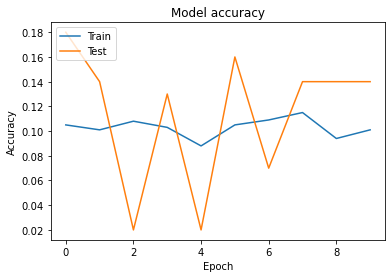

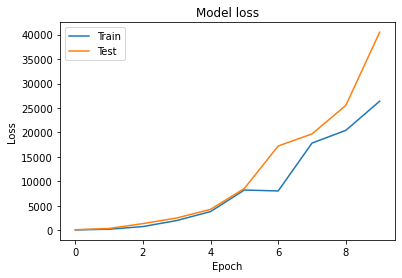

In [13]:
# Plot training & validation accuracy values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
#alternatively
# Instantiates a toy dataset instance:
dataset = tf.data.Dataset.from_tensor_slices((data, labels))

dataset = dataset.batch(32)

#Since the Dataset yields batches of data, this snippet does not require a batch_size.
History=model.fit(dataset, epochs=10)


Train for 32 steps
Epoch 1/10
32/32 [==============================] - 0s 7ms/step - loss: 32324.4342 - accuracy: 0.0970
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 35083.8855 - accuracy: 0.0930
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 49195.1735 - accuracy: 0.0950
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 47897.1073 - accuracy: 0.1100
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 68369.6433 - accuracy: 0.0910
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 55712.5929 - accuracy: 0.1100
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 83868.5235 - accuracy: 0.1160
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 82611.4858 - accuracy: 0.0830
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 101364.2294 - accuracy: 0.1090
Epoch 10/10
32/32 [==============================] - 0s 2ms/st

## Evaluate
The tf.keras.Model.evaluate and tf.keras.Model.predict methods can use NumPy data and a tf.data.Dataset.

Returns the loss value & metrics values for the model in test mode.

Computation is done in batches.  Scalar test loss (if the model has a single output and no metrics) or list of scalars (if the model has multiple outputs and/or metrics). The attribute model.metrics_names will give you the display labels for the scalar outputs.

Here's how to evaluate the inference-mode loss and metrics for the data provided:

In [15]:
# With Numpy arrays
data = np.random.random((1000, 32))
labels = np.random.random((1000, 10))

model.evaluate(data, labels, batch_size=32)

# With a Dataset
dataset = tf.data.Dataset.from_tensor_slices((data, labels))
dataset = dataset.batch(32)

results=model.evaluate(dataset)

print('test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print('\n# Generate predictions for 3 samples')
predictions = model.predict(data[:3])
print('predictions shape:', predictions.shape)

32/32 [==============================] - 0s 3ms/step - loss: 132800.5217 - accuracy: 0.1020
test loss, test acc: [132800.52172851562, 0.102]

# Generate predictions for 3 samples
predictions shape: (3, 10)


In [16]:
model.metrics_names

['loss', 'accuracy']

## Prediction

Generates output predictions for the input samples.

Computation is done in batches.  Returns a Numpy array(s) of predictions.

In [17]:
result = model.predict(data, batch_size=32)
print(result.shape)

(1000, 10)


In [18]:
print(data[0])
print(labels[0])
print(result[0,:])

[0.943  0.3707 0.9322 0.8449 0.8159 0.1471 0.9918 0.3955 0.4285 0.0418
 0.1532 0.7112 0.4929 0.6262 0.2774 0.3692 0.8788 0.5608 0.4245 0.5011
 0.6021 0.9617 0.5802 0.5104 0.4817 0.2082 0.1756 0.1005 0.7123 0.2671
 0.2685 0.0182]
[0.0967 0.3712 0.6109 0.3768 0.2325 0.1415 0.4221 0.2649 0.2348 0.7954]
[31954170. 31893762. 31966256. 31960614. 31943820. 31930256. 31954746.
 31966524. 31911300. 31922956.]


## What do we do with the result?

No idea, it's a horrible example other than to show you how Keras is setup and initial model building.